In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mintemp=pd.read_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\MinTemperature\MinTemperature.csv")

In [3]:
mintemp

,Year,Month,MinPast,Minpasttopast,MinTemperature
0,2002,1,14.99,13.90,13.02
1,2002,2,15.43,15.33,17.66
2,2002,3,18.46,17.39,19.72
3,2002,4,23.48,22.88,23.49
4,2002,5,23.05,23.24,24.26
...,...,...,...,...,...
223,2020,8,21.36,21.30,NaN
224,2020,9,21.60,20.41,NaN
225,2020,10,19.67,19.61,NaN
226,2020,11,14.77,17.53,NaN


In [4]:
mintemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            228 non-null    int64  
 1   Month           228 non-null    int64  
 2   MinPast         228 non-null    float64
 3   Minpasttopast   228 non-null    float64
 4   MinTemperature  216 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 9.0 KB


In [5]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=mintemp.corr()
corr_matrix

,Year,Month,MinPast,Minpasttopast,MinTemperature
Year,1.000000e+00,5.594086e-15,0.010485,0.031440,0.003306
Month,5.594086e-15,1.000000e+00,-0.084588,-0.083956,-0.083392
MinPast,1.048486e-02,-8.458830e-02,1.000000,0.937049,0.934358
Minpasttopast,3.144013e-02,-8.395556e-02,0.937049,1.000000,0.939025
MinTemperature,3.306113e-03,-8.339238e-02,0.934358,0.939025,1.000000


In [6]:
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

In [7]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [8]:
mintemp=mintemp.drop(['Month'],axis=1)

In [9]:
mintemp.shape

(228, 4)

In [10]:
mintemp1=mintemp.iloc[:216,:].values

In [11]:
mintemp1

array([[2002.  ,   14.99,   13.9 ,   13.02],
       [2002.  ,   15.43,   15.33,   17.66],
       [2002.  ,   18.46,   17.39,   19.72],
       [2002.  ,   23.48,   22.88,   23.49],
       [2002.  ,   23.05,   23.24,   24.26],
       [2002.  ,   22.33,   22.42,   23.13],
       [2002.  ,   21.67,   21.25,   21.96],
       [2002.  ,   21.32,   21.09,   21.23],
       [2002.  ,   21.19,   20.88,   20.69],
       [2002.  ,   18.95,   19.65,   19.43],
       [2002.  ,   15.73,   15.9 ,   16.08],
       [2002.  ,   13.27,   12.53,   14.67],
       [2003.  ,   13.02,   14.99,   15.98],
       [2003.  ,   17.66,   15.43,   17.58],
       [2003.  ,   19.72,   18.46,   20.01],
       [2003.  ,   23.49,   23.48,   23.26],
       [2003.  ,   24.26,   23.05,   22.81],
       [2003.  ,   23.13,   22.33,   23.05],
       [2003.  ,   21.96,   21.67,   22.4 ],
       [2003.  ,   21.23,   21.32,   21.64],
       [2003.  ,   20.69,   21.19,   20.99],
       [2003.  ,   19.43,   18.95,   19.55],
       [20

In [12]:
X=mintemp1[:,:-1]
y=mintemp1[:,-1]

In [13]:
X

array([[2002.  ,   14.99,   13.9 ],
       [2002.  ,   15.43,   15.33],
       [2002.  ,   18.46,   17.39],
       [2002.  ,   23.48,   22.88],
       [2002.  ,   23.05,   23.24],
       [2002.  ,   22.33,   22.42],
       [2002.  ,   21.67,   21.25],
       [2002.  ,   21.32,   21.09],
       [2002.  ,   21.19,   20.88],
       [2002.  ,   18.95,   19.65],
       [2002.  ,   15.73,   15.9 ],
       [2002.  ,   13.27,   12.53],
       [2003.  ,   13.02,   14.99],
       [2003.  ,   17.66,   15.43],
       [2003.  ,   19.72,   18.46],
       [2003.  ,   23.49,   23.48],
       [2003.  ,   24.26,   23.05],
       [2003.  ,   23.13,   22.33],
       [2003.  ,   21.96,   21.67],
       [2003.  ,   21.23,   21.32],
       [2003.  ,   20.69,   21.19],
       [2003.  ,   19.43,   18.95],
       [2003.  ,   16.08,   15.73],
       [2003.  ,   14.67,   13.27],
       [2004.  ,   15.98,   13.02],
       [2004.  ,   17.58,   17.66],
       [2004.  ,   20.01,   19.72],
       [2004.  ,   23.26,   

In [14]:
y

array([13.02, 17.66, 19.72, 23.49, 24.26, 23.13, 21.96, 21.23, 20.69,
       19.43, 16.08, 14.67, 15.98, 17.58, 20.01, 23.26, 22.81, 23.05,
       22.4 , 21.64, 20.99, 19.55, 17.16, 14.24, 14.43, 15.86, 20.33,
       22.28, 23.22, 22.39, 21.8 , 21.18, 20.94, 18.4 , 16.17, 12.54,
       14.35, 16.45, 18.88, 22.41, 23.09, 23.57, 22.45, 21.37, 21.39,
       18.65, 13.04, 12.21, 12.3 , 15.42, 19.37, 22.32, 23.88, 22.4 ,
       21.7 , 21.03, 21.33, 19.32, 16.98, 12.87, 13.28, 16.13, 19.86,
       23.53, 23.66, 23.76, 22.29, 21.69, 21.4 , 17.81, 14.9 , 14.74,
       12.95, 15.25, 20.3 , 22.35, 22.42, 22.8 , 22.33, 21.48, 20.6 ,
       18.19, 16.34, 14.56, 14.68, 16.89, 20.35, 23.2 , 23.62, 22.9 ,
       22.28, 21.75, 21.53, 19.12, 16.77, 14.38, 14.06, 17.32, 21.57,
       23.79, 24.97, 23.2 , 22.14, 21.66, 21.37, 19.74, 19.43, 13.15,
       12.3 , 15.68, 19.78, 22.47, 23.48, 22.75, 22.  , 21.58, 20.7 ,
       19.91, 15.57, 13.5 , 13.47, 16.44, 17.62, 23.42, 22.93, 22.9 ,
       22.19, 21.78,

In [15]:
X.shape

(216, 3)

In [16]:
y.shape

(216,)

In [17]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [18]:
X_train,y_train=np.array(X_train),np.array(y_train)

# Linear Regressor

In [19]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [20]:
li=LinearRegression()

In [21]:
li.fit(X_train,y_train)

LinearRegression()

In [22]:
Lir_ypred= li.predict(X_test)
Lir_ypred

array([14.44575227, 22.06974897, 19.41257304, 13.98005591, 17.18963477,
       18.07674102, 19.63460849, 21.2684096 , 21.98230471, 20.91027975,
       19.65040659, 21.43664627, 19.26532983, 16.69727447, 23.09078491,
       16.14482693, 15.45222178, 23.31705026, 21.5475298 , 22.99481979,
       14.06405465, 22.96396789])

In [23]:
Linear=pd.DataFrame({'Actual':y_test,'Predicted':Lir_ypred})
Linear

,Actual,Predicted
0,12.94,14.445752
1,22.29,22.069749
2,19.91,19.412573
3,14.06,13.980056
4,15.68,17.189635
5,19.12,18.076741
6,20.30,19.634608
7,21.03,21.268410
8,22.17,21.982305
9,21.60,20.910280


In [24]:
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 0.900388355858522
Root Mean Squared Error: 0.9488879574841921
R2_Score: 0.9290379137815297


In [26]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.9290379137815297

# Lasso Regressor

In [27]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [28]:
Lass_ypred= lass.predict(X_test)

In [29]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 0.9003498523395401
Root Mean Squared Error: 0.948867668507859
R2_Score: 0.9290409483499089


In [30]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.9290409483499089

# Ridge Regressor

In [31]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [32]:
rid_ypred= rid.predict(X_test)

In [33]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 0.900388397653704
Root Mean Squared Error: 0.9488879795074359
R2_Score: 0.9290379104875363


In [34]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.9290379104875363

# Decision Tree

In [35]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [36]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [37]:
dt_ypred= dt.predict(X_test)

In [38]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 3.890250000000002
Root Mean Squared Error: 1.9723716688291795
R2_Score: 0.6933986827848517


In [39]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.6933986827848517

# KNN Regressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=10)
kn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [41]:
kn1_pred=kn.predict(X_test)

In [42]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 0.8847837272727282
Root Mean Squared Error: 0.9406294314302143
R2_Score: 0.9302677575394006


In [43]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.9302677575394006

# SVR rbf

In [44]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

In [45]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 14.323630349462944
Root Mean Squared Error: 3.7846572301151586
R2_Score: -0.12888475867828775


In [46]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

-0.12888475867828775

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [49]:
rf_pred=rf.predict(X_test)

In [50]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 1.7146088282044862
Root Mean Squared Error: 1.3094307267681198
R2_Score: 0.8648669557904461


In [51]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.8648669557904461

# Bayes Regressor

In [52]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)

BayesianRidge()

In [53]:
br_pred=br.predict(X_test)

In [54]:
print('Mean squared Error:',mean_squared_error(y_test,br_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,br_pred)))
print('R2_Score:',r2_score(y_test,br_pred))

Mean squared Error: 0.9036571500003905
Root Mean Squared Error: 0.9506088312236483
R2_Score: 0.9287802911121377


In [55]:
bayes_r2_score=r2_score(y_test,br_pred)
bayes_r2_score

0.9287802911121377

In [56]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\2049796945.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


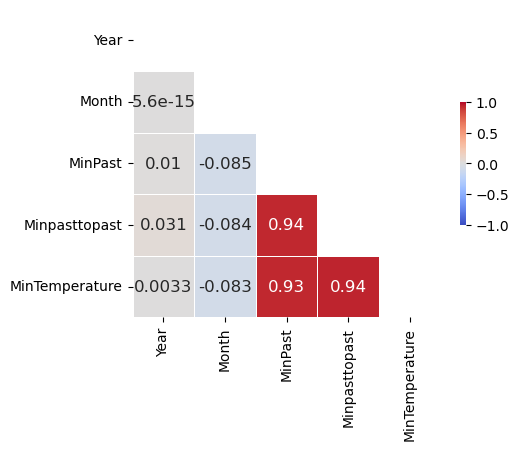

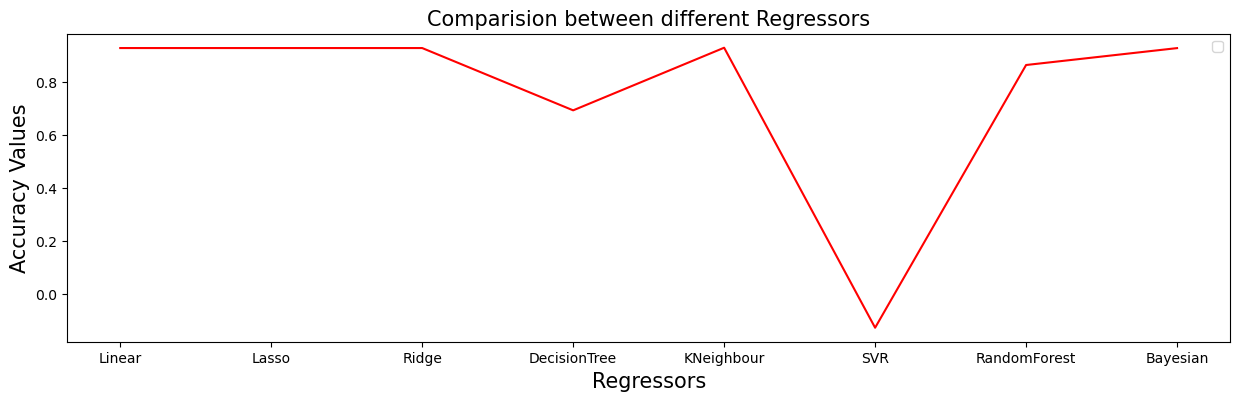

In [57]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


# KNN with neighbour=10 is best for mintemperature prediction with accuracy of 93% followed by Lasso with 92.04% 

In [59]:
mintemp2020=pd.read_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\MinTemperature\mintemp2020pred.csv")

In [60]:
mintemp2020.drop(['MinTemperature','Month'],axis=1,inplace=True)

In [61]:
mintemp2020=mintemp2020.iloc[:,:].values

In [62]:
mintemp2020

array([[2020.  ,   13.43,   12.84],
       [2020.  ,   16.26,   16.68],
       [2020.  ,   18.75,   20.58],
       [2020.  ,   21.43,   23.02],
       [2020.  ,   24.39,   24.14],
       [2020.  ,   23.06,   23.1 ],
       [2020.  ,   22.17,   21.98],
       [2020.  ,   21.36,   21.3 ],
       [2020.  ,   21.6 ,   20.41],
       [2020.  ,   19.67,   19.61],
       [2020.  ,   14.77,   17.53],
       [2020.  ,   13.46,   14.13]])

In [63]:
mintemp2020_pred=[]

In [64]:
mintemp2020_pred=kn.predict(mintemp2020)

In [65]:
mintemp2020_pred

array([14.014, 15.819, 20.42 , 21.943, 23.074, 22.771, 21.943, 21.173,
       20.742, 20.42 , 14.973, 14.358])

In [66]:
mintemp_data=pd.DataFrame(data=mintemp2020_pred)
mintemp_data

,0
0,14.014
1,15.819
2,20.420
3,21.943
4,23.074
5,22.771
6,21.943
7,21.173
8,20.742
9,20.420


In [68]:
mintemp_data.to_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\MinTemperature\2020mintemp.csv")